In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

EJERCICIO 1

En este ejercicio nos queda por limpiar las columnas de age y species:

In [10]:
df = pd.read_csv("../../datos/attacks_limpio_1.csv", index_col=0)

In [11]:
df.head()

,case_number,year,mes,country,type,activity,age,sex,species,fatal
0,1800.00.00,1800,NaN,seychelles,Unprovoked,a corsair's boat was overturned,NaN,F,NaN,y
1,1797.05.28.R,1797,May,NaN,Unprovoked,Dropped overboard,NaN,NaN,NaN,y
2,1792.09.12,1792,Sep,england,Provoked,Fishing,NaN,M,NaN,y
3,1791.00.00,1791,NaN,australia,Unprovoked,NaN,NaN,F,NaN,y
4,1788.05.10,1788,May,australia,Boat,Fishing,NaN,NaN,NaN,n


In [12]:
df_copia=df.copy()

Extraemos el nombre de la especie de la columna species

In [13]:
# modificar patron regex para que sea mas corto
# cambiar primero todos los registros a minusculas, asi que no se tiene que incluir en patron reguex

def species_name(x):
    try:
       return (re.findall(r'[Tt]iger\s[Ss]hark|[Ww]hite\s[Ss]hark|[Ll]emon\s[Ss]hark|[Bb]ull\s[Ss]hark|[Gg]rey\s[Ss]hark', x)[0]).upper()
    except:
        return 'UNKNOWN'

In [14]:
df_copia['species'] = df_copia['species'].apply(species_name)
df_copia['species'].unique()

array(['UNKNOWN', 'TIGER SHARK', 'WHITE SHARK', 'BULL SHARK',
       'LEMON SHARK', 'GREY SHARK'], dtype=object)

Columna de age: es una columna de tipo string pero debería ser de tipo integer. Además, en esta columna nos vamos a encontrar con algunos errores tipográficos.

In [15]:
df_copia['age'].unique()

array([nan, 'young', '14', '19', '20', '15', '21', '27', '36', '25', '6',
       '16', '50', '13 or 14', '57', '11', '48', '18', '52', '12', '32',
       '10', '34', '30', '60', '33', '29', '54', '41', '37', '56', '69',
       '38', '55', '35', '46', '45', '40s', '28', '24', '26', '49', '22',
       '7', '31', '17', '40', '13', '42', '3', '8', '82', '73', '20s',
       '68', '51', '39', '58', 'Teen', '47', '61', '65', '66', '43',
       '60s', '9', '72', '59', '64', '23', '71', '44', '62', '63', '70',
       '18 months', '53', '30s', '50s', 'teen', '77', '74', '28 & 26',
       '5', '86', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '84', '\xa0 ', ' ', '30 or 36',
       '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ',
       '21 or 26', '20 ', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
     

In [16]:
def edades(x):
    try:
       return (re.findall(r'\d+\b', x))
    except:
        return np.nan

In [17]:
df_copia['age'] = df_copia['age'].apply(edades)
df_copia['age'].value_counts()

[17]        154
[18]        151
[19]        143
[20]        143
[15]        139
           ... 
[32, 30]      1
[16, 18]      1
[87]          1
[21, 26]      1
[31, 33]      1
Name: age, Length: 116, dtype: int64

In [18]:
df_copia = df_copia.explode('age')

In [19]:
df_copia.shape

(6328, 10)

In [20]:
df_copia['age'] = df_copia['age'].astype('Int64', errors='ignore')

In [21]:
df_copia['age'].dtypes

Int64Dtype()

In [22]:
df_copia['age'].unique()
# vemos que al hacer el cambio de tipo de dato a integer, nos cambio los np.nan por pd.NA

<IntegerArray>
[<NA>,   14,   19,   20,   15,   21,   27,   36,   25,    6,   16,   50,   13,
   57,   11,   48,   18,   52,   12,   32,   10,   34,   30,   60,   33,   29,
   54,   41,   37,   56,   69,   38,   55,   35,   46,   45,   28,   24,   26,
   49,   22,    7,   31,   17,   40,   42,    3,    8,   82,   73,   68,   51,
   39,   58,   47,   61,   65,   66,   43,    9,   72,   59,   64,   23,   71,
   44,   62,   63,   70,   53,   77,   74,    5,   86,   84,   75,   87,   67,
    1,    2,   81,   78]
Length: 82, dtype: Int64

In [23]:
df_copia['age'] = df_copia['age'].astype('float', errors='ignore')

In [24]:
df_copia['age'].unique()
# si lo cambiamos a float, volvemos a tener nuestros np.nan, los cuales son más amigables para trabajar

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 28., 24., 26.,
       49., 22.,  7., 31., 17., 40., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

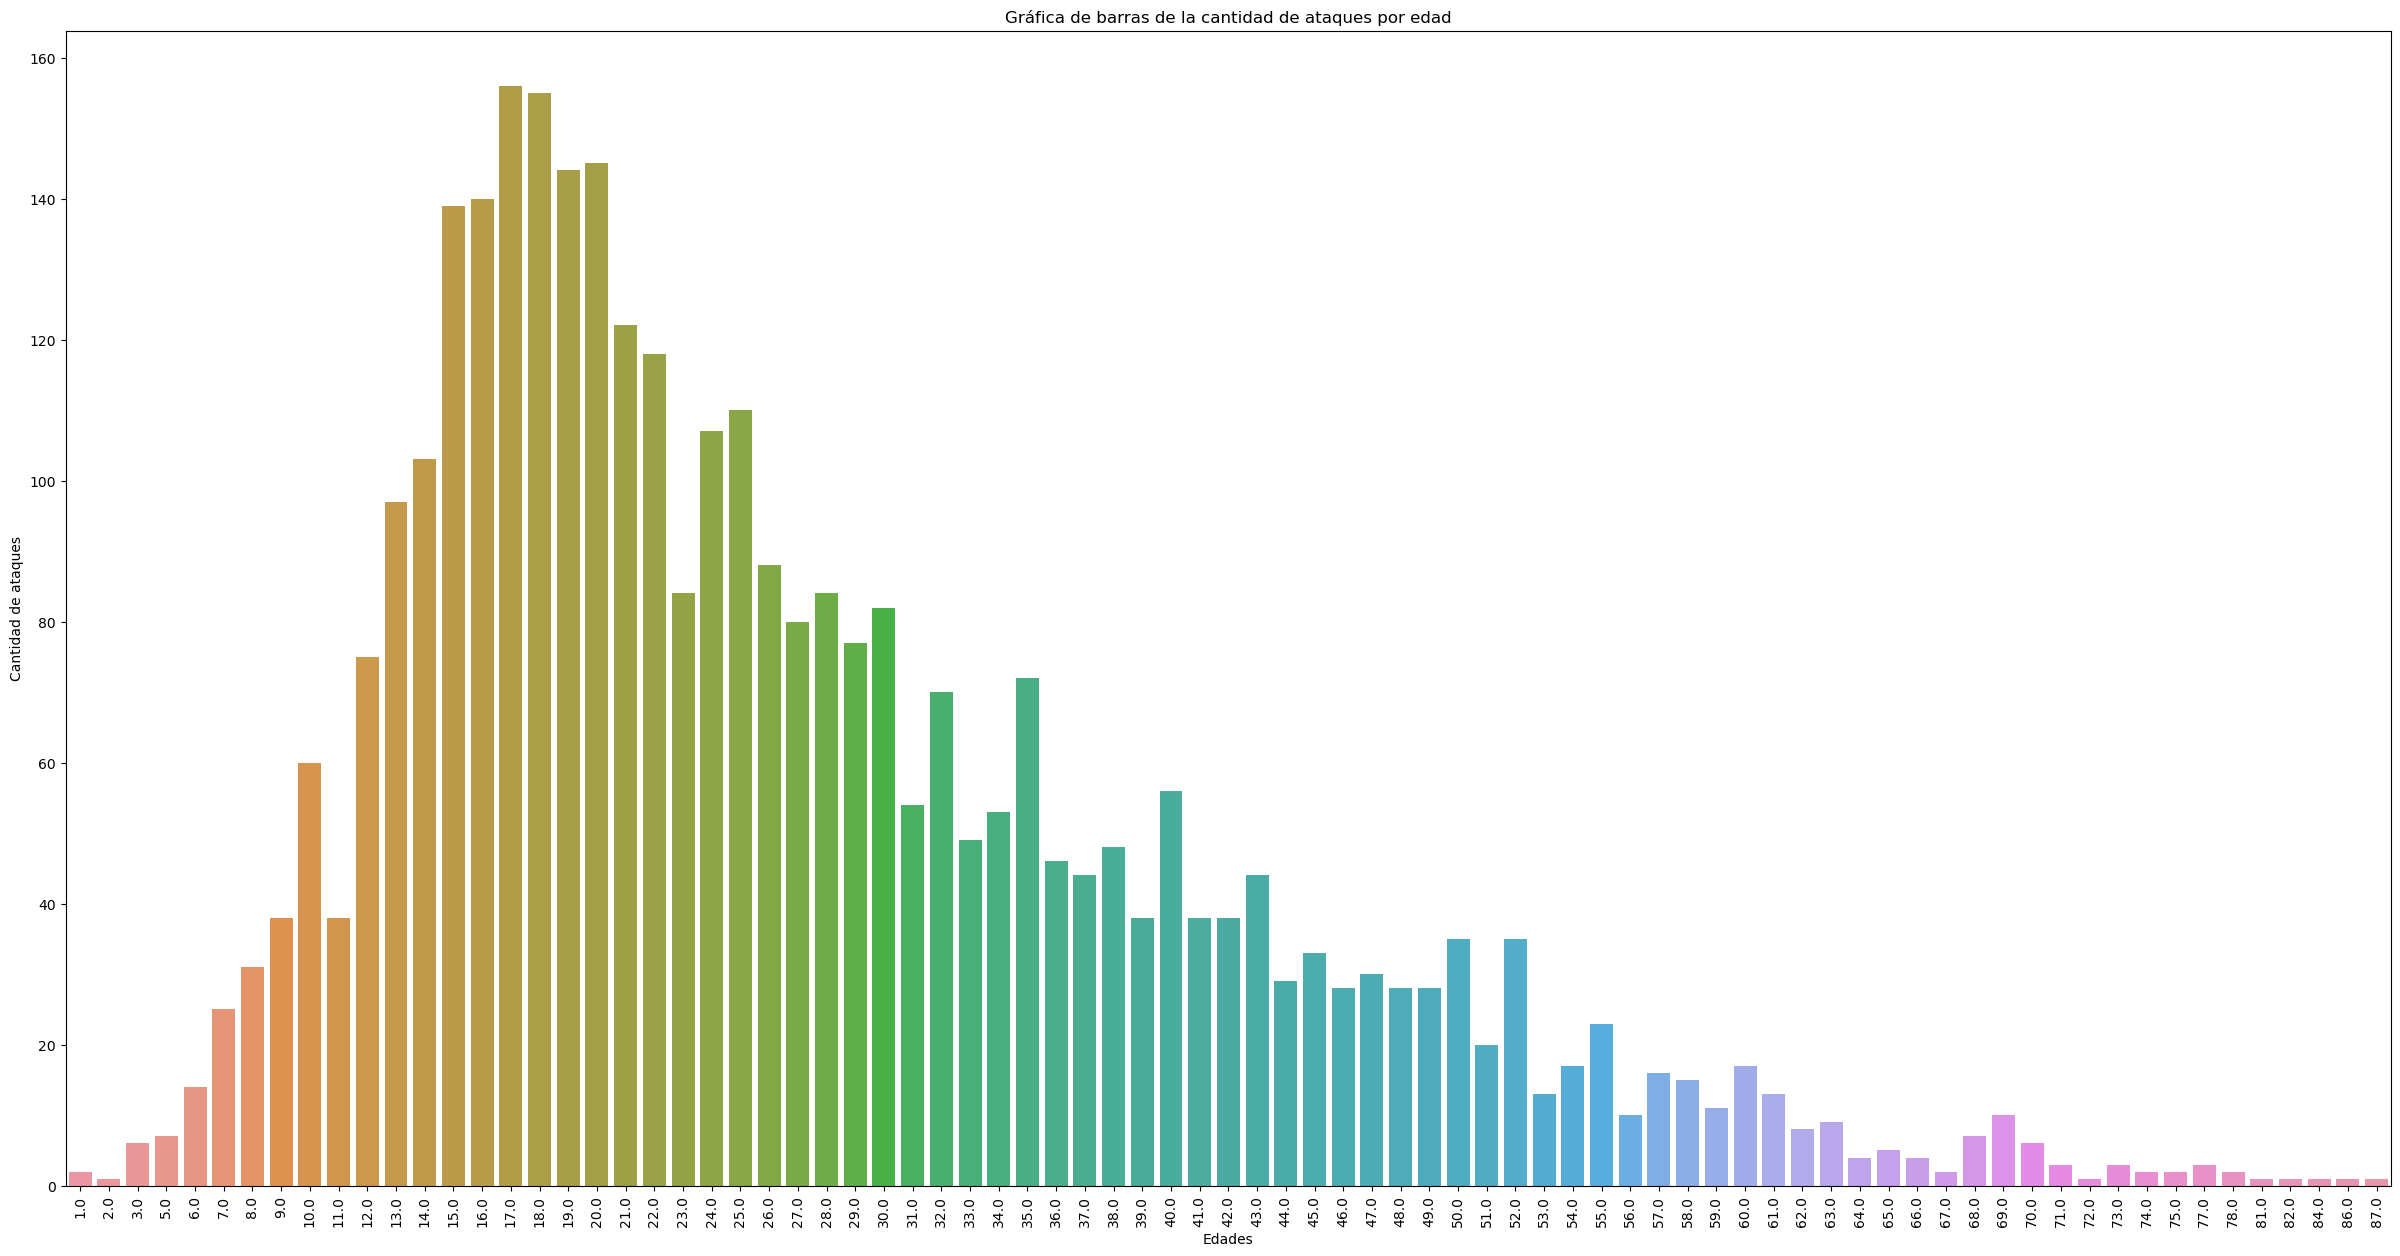

In [36]:

fig,ax = plt.subplots(figsize=(30,15))

sns.countplot(data=df_copia, x='age')
plt.xticks(rotation=90)
plt.title('Gráfica de barras de la cantidad de ataques por edad')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de ataques')

plt.show()


In [26]:
df_copia.dtypes

case_number     object
year             int64
mes             object
country         object
type            object
activity        object
age            float64
sex             object
species         object
fatal           object
dtype: object

In [37]:
df_copia.to_csv('../../datos/attacks_limpio_2.csv')